# NumPy Tutorial

## What is NumPy?

- A Python librrary to efficiently store and operate data in-memory
- A core library of the ecosystem of data science tools in Python
- Its main object is the homogeneous multidimensional array

    * array -- a block of elements with the same data type and indexed by a tuple of integers
    * multidimensional
    * homogeneous

## NumPy Basics

In [1]:
import numpy as np

### np.ndarray versus np.array

Read the documentation of `np.ndarray` and `np.array`. Then answer the following questions.

1. Is `np.array` a function or a class? How about `np.ndarray`?
1. Can you explain the meaning of the following attributes of `np.ndarray`?
   + T
   + data
   + dtype
   + size
   + nbytes
   + itemsize
   + nbytes
   + ndim
   + shape
   + base
   + stride
   + real
   + image
1. What objects can be the first argument of `np.array()`?
1. How to create a $2 \times 2$ np.ndarray with values 1, 2, 3, 4?
1. Does Python have a buil-in array?
   + list
   + array module


In [2]:
?np.array

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (row major) unless 'F' is
    specified, in which case it will be in Fortran order (column major).
   

In [3]:
?np.ndarray

Init signature: np.ndarray(self, /, *args, **kwargs)
Docstring:     
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tuple of ints
    Shape of created array.
dtype : data-type, optional
    Any object that can be interpreted as a numpy data type.
buffer : object exposing buffer int

In [4]:
import inspect

a = np.arange(5)

print("Attributes:")
for m in inspect.getmembers(a):
    if not m[0].startswith('_'):
        if not inspect.isbuiltin(m[1]):
            print("\t", m[0])

print("Methods:")
for m in inspect.getmembers(a):
    if not m[0].startswith('_'):
        if inspect.isbuiltin(m[1]):
            print("\t", m[0])

Attributes:
	 T
	 base
	 ctypes
	 data
	 dtype
	 flags
	 flat
	 imag
	 itemsize
	 nbytes
	 ndim
	 real
	 shape
	 size
	 strides
Methods:
	 all
	 any
	 argmax
	 argmin
	 argpartition
	 argsort
	 astype
	 byteswap
	 choose
	 clip
	 compress
	 conj
	 conjugate
	 copy
	 cumprod
	 cumsum
	 diagonal
	 dot
	 dump
	 dumps
	 fill
	 flatten
	 getfield
	 item
	 itemset
	 max
	 mean
	 min
	 newbyteorder
	 nonzero
	 partition
	 prod
	 ptp
	 put
	 ravel
	 repeat
	 reshape
	 resize
	 round
	 searchsorted
	 setfield
	 setflags
	 sort
	 squeeze
	 std
	 sum
	 swapaxes
	 take
	 tobytes
	 tofile
	 tolist
	 tostring
	 trace
	 transpose
	 var
	 view


### Concepts

In [5]:
x = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int32)
x

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [6]:
type(x)

numpy.ndarray

In [7]:
x.shape

(2, 3)

In [8]:
x.dtype

dtype('int32')

In [9]:
x.T

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int32)

### Array reshaping

In [10]:
a = np.arange(24)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [11]:
b = a.reshape(3, 8)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [12]:
c = b.reshape(3, 2, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [13]:
print("a[12] = ", a[12])
print("b[1][4] = ", b[1][4])
print("c[1][1][0] = ", c[1][1][0] )


a[12] =  12
b[1][4] =  12
c[1][1][0] =  12


In [14]:
c.base

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [15]:
c[-1, -1, -1] = 100
a[-1]

100

### ndarray memory layout

In [3]:
import numpy as np
import pandas as pd
import collections

In [4]:
a = np.arange(10, dtype=np.float32)
b = a.reshape(2, 5)
d = collections.defaultdict(dict)
for n, c in {"a": a, "b": b}.items():
    for i, f in enumerate(str(c.flags).split('\n')):
        if f != '':
            k, v = f.split(":")
            d[n]["flags." + k] = v
    d[n]['shape'] = c.shape
    d[n]['strides'] = c.strides
    d[n]['ndim'] = c.ndim
    d[n]['size'] = c.size
    d[n]['itemsize'] = c.itemsize
    d[n]['nbytes'] = c.nbytes
    d[n]['base'] = c.base    
df = pd.DataFrame({"a": d["a"], "b": d["b"]})

In [5]:
df

,a,b
flags. C_CONTIGUOUS,True,True
flags. F_CONTIGUOUS,True,False
flags. OWNDATA,True,False
flags. WRITEABLE,True,True
flags. ALIGNED,True,True
flags. WRITEBACKIFCOPY,False,False
flags. UPDATEIFCOPY,False,False
shape,"(10,)","(2, 5)"
strides,"(4,)","(20, 4)"
ndim,1,2


## ndarray creation

### Converting Python array_like Objects to NumPy Arrays

In [37]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
x

array([1., 2., 3., 4.], dtype=float32)

In [38]:
y = np.array([range(i, i+3) for i in [2, 4, 6]])
y

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Creating Arrays from scratch

In [74]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [75]:
np.full((3, 3), 100)

array([[100, 100, 100],
       [100, 100, 100],
       [100, 100, 100]])

In [77]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

In [78]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [76]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

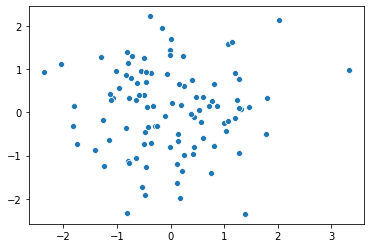

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a = np.random.normal(0, 1, (100, 2))
_ = sns.scatterplot(x=a[:, 0], y=a[:, 1])

### Array Indexing and Slicing

In [88]:
x = np.arange(24).reshape(2, 3, 4)
print('x =\n', x)

 x =
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [89]:
print('x[1] =\n', x[1])

 x[1] =
 [[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [90]:
print('x[1, 2] =\n', x[1, 2])

x[1, 2] =
 [20 21 22 23]


In [93]:
print('x[1, 2, 3] =', x[1, 2, 3])

x[1, 2, 3] = 23


In [95]:
print('x[1, 1:3, 0:2] =\n', x[1, 1:3, 0:2])

x[1, 1:3, 0:2] =
 [[16 17]
 [20 21]]


In [98]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [107]:
x = np.arange(8)
print('x =', x)
print('x[1:7:2] = ', x[1:7:2])
print('x[1::2] = ', x[1::2])
print('x[::2] = ', x[::2])
print('x[-1::] = ', x[-1::])
print('x[-1::-1] = ', x[-1::-1])

x = [0 1 2 3 4 5 6 7]
x[1:7:2] =  [1 3 5]
x[1::2] =  [1 3 5 7]
x[::2] =  [0 2 4 6]
x[-1::] =  [7]
x[-1::-1] =  [7 6 5 4 3 2 1 0]


### Array Manipulation Routines

## Concatenation of Arrays

In [52]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
z = np.array([0, 0])
w = np.concatenate([x, y, z])
print('x=', x)
print('y=', y)
print('z=', z)
print('w=', w)

x= [1 2 3]
y= [3 2 1]
z= [0 0]
w= [1 2 3 3 2 1 0 0]


In [63]:
x = np.arange(12).reshape(3, 4)
y = np.arange(4).reshape(1, 4)
z = np.concatenate([x, y])
print('x=\n', x)
print('y=\n', y)
print('z=\n', z)

x=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
y=
 [[0 1 2 3]]
z=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]]


In [67]:
x = np.arange(12).reshape(3, 4)
y = np.arange(4).reshape(1, 4)
z = np.vstack([x, y])
print('x=\n', x)
print('y=\n', y)
print('z=\n', z)
# This will trigger an error
# w = np.hstack([x, y])

x=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
y=
 [[0 1 2 3]]
z=
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  1  2  3]]


In [69]:
x = np.arange(12).reshape(4, 3)
y = np.arange(4).reshape(4, 1)
# now we should use np.hstack
z = np.hstack([x, y])
print('x=\n', x)
print('y=\n', y)
print('z=\n', z)
# This will trigger an error
# w = np.vstack([x, y])

x=
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
y=
 [[0]
 [1]
 [2]
 [3]]
z=
 [[ 0  1  2  0]
 [ 3  4  5  1]
 [ 6  7  8  2]
 [ 9 10 11  3]]


### Splitting

In [71]:
a = np.arange(10)
np.split(a, [1, 3, 6, ])

[array([0]), array([1, 2]), array([3, 4, 5]), array([6, 7, 8, 9])]

In [72]:
grid = a = np.arange(16).reshape(4, 4)
np.hsplit(grid, [1, 3])

[array([[ 0],
        [ 4],
        [ 8],
        [12]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10],
        [13, 14]]),
 array([[ 3],
        [ 7],
        [11],
        [15]])]

In [73]:
np.vsplit(grid, [1, 3])

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15]])]

## Universal Functions

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. This can be accomplished by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

### The Performance of UFunc versus For-loop

In [127]:
import math
theta = np.linspace(0, np.pi, 10)
y = np.zeros(theta.size)

In [128]:
%%timeit
for i in range(theta.size):
    y[i] = math.sin(theta[i])

4.77 µs ± 60.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [129]:
%%timeit
y = np.sin(theta)

703 ns ± 18.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [131]:
# Performance improvement
4.77 * 1000 / 703

6.78520625889047

### Array arithmetic

NumPy's ufuncs make use of Python's native arithmetic operators. NumPy implements the standard addition, subtraction, multiplication, and division operators for ndarray objects. You can use either the standard operators or the equivalent ufuncs.

| Operator | Equivalent ufunc	| Description |
| :------------- | :----------: | -----------: |
| +	| np.add	| Addition (e.g., 1 + 1 = 2) |
| -	| np.subtract |	Subtraction (e.g., 3 - 2 = 1) |
| -	| np.negative |	Unary negation (e.g., -2) |
| *	| np.multiply |	Multiplication (e.g., 2 * 3 = 6) |
| /	| np.divide	| Division (e.g., 3 / 2 = 1.5) |
| // |	np.floor_divide |	Floor division (e.g., 3 // 2 = 1) |
| ** |	np.power	| Exponentiation (e.g., 2 ** 3 = 8) |
| %	| np.mod	| Modulus/remainder (e.g., 9 % 4 = 1) |

In [135]:
x = np.arange(5)
print("x =", x)
print("x + 10 =", x + 10)
print("np.add(x, 10) = ", np.add(x, 10))
print("x ** 2 =", x ** 2)
print("np.power(x, 2) = ", np.power(x, 2))

x = [0 1 2 3 4]
x + 10 = [10 11 12 13 14]
np.add(x, 10) =  [10 11 12 13 14]
x ** 2 = [ 0  1  4  9 16]
np.power(x, 2) =  [ 0  1  4  9 16]


### Reduce

In [143]:
x = np.arange(1, 6)
print("x =", x)
print("np.add.reduce(x) = ", np.add.reduce(x))
print("np.multiply.reduce(x) = ", np.multiply.reduce(x))
print("np.add.accumulate(x) = ", np.add.accumulate(x))
print("np.multiply.accumulate(x) = ", np.multiply.accumulate(x))
print("np.cumprod(x) = ", np.cumprod(x))

x = [1 2 3 4 5]
np.add.reduce(x) =  15
np.multiply.reduce(x) =  120
np.add.accumulate(x) =  [ 1  3  6 10 15]
np.multiply.accumulate(x) =  [  1   2   6  24 120]
np.cumprod(x) =  [  1   2   6  24 120]


### Custome UFunc

In [158]:
?np.frompyfunc

In [188]:
def discount(x):
    if x < 5:
        return 0
    if x < 20:
        return math.floor(0.2 * x)
    return math.floor(0.4 * x)

In [189]:
uf_discount = np.frompyfunc(discount, 1, 1)

In [190]:
price = np.arange(1, 40, 8)
discounts = uf_discount(price)
print("price = ", price)
print("discounts = ", discounts)

price =  [ 1  9 17 25 33]
discounts =  [0 1 3 10 13]


In [185]:
# help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above fo

### Broadcasting

In [191]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a * b)

[2. 4. 6.]


In [192]:
b = 2.0
print(a * b)

[2. 4. 6.]


In [194]:
a = np.array([[ 0.0,  0.0,  0.0],
           [10.0, 10.0, 10.0],
           [20.0, 20.0, 20.0],
           [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])
print(a + b)

[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [195]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([1.0, 2.0, 3.0])
print(a[:, np.newaxis] + b)

[[2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]


## k-Nearst Neighbor

The k-nearest neighbors algorithm (k-NN) is a learning algorithm that can be used for both classification and regression.
+ In k-NN classification, the output is a class membership of an object decided by a plurality vote of its neighbors.
+ In k-NN regression, the output is the average of the values of k nearest neighbors.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [7]:
# Get data
X = np.random.rand(10, 2)

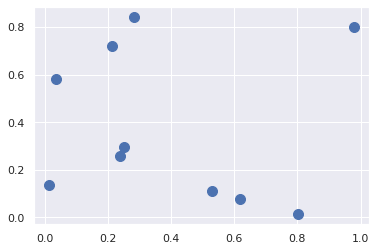

In [8]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=100)

In [9]:
# compute squared distances of any pair of points
pair_difference = X[:, np.newaxis, :] - X[np.newaxis, :, :]
pair_difference.shape

(10, 10, 2)

In [10]:
sq_pair_difference = pair_difference ** 2
pair_difference.shape

(10, 10, 2)

In [11]:
sq_dist = np.sum(sq_pair_difference, axis=2)
sq_dist.shape

(10, 10)

In [12]:
# Verify: the diagnal of the sq_dist should all be zero

d = sq_dist.diagonal()
d

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# You can use the assert to ensure all items in the diagonal of sq_dist are zeros
assert(np.all(d == 0))

In [228]:
?assert

Object `assert` not found.


In [14]:
# Sort each row to find the nearest neighbor
nearest = np.argsort(sq_dist, axis=1)
print(nearest)
# The leftmost item of each row is the index of the row. 
# This is what we expected since the nearest point of any point is itself.

[[0 4 5 7 9 2 6 1 8 3]
 [1 6 3 2 8 9 5 4 7 0]
 [2 9 7 1 6 3 8 5 4 0]
 [3 1 6 8 2 9 5 4 7 0]
 [4 5 8 6 1 0 3 2 9 7]
 [5 4 8 6 1 3 2 9 0 7]
 [6 1 3 2 8 5 9 4 7 0]
 [7 9 2 1 6 3 0 5 8 4]
 [8 5 6 4 1 3 2 9 7 0]
 [9 2 7 1 6 3 5 8 0 4]]


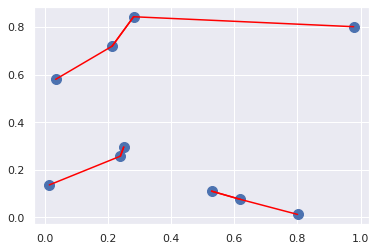

In [15]:
# connect each point with its nearest neighbor
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    j = nearest[i][1]
    pair_x = [X[i][0], X[j][0]]
    pair_y = [X[i][1], X[j][1]]
    plt.plot(pair_x, pair_y, color='red')
    

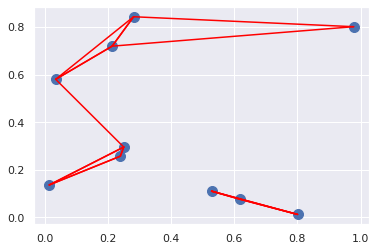

In [16]:
# We want to connect the two nearest neighbor
K = 2
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    for j in nearest[i, 1:K+1]:
        pair_x = [X[i, 0], X[j, 0]]
        pair_y = [X[i,1], X[j, 1]]
        plt.plot(pair_x, pair_y, color='red')

In [17]:
# put it togther

def plot_knn(X, K):
    pair_difference = X[:, np.newaxis, :] - X[np.newaxis, :, :]
    sq_pair_difference = pair_difference ** 2
    sq_dist = np.sum(sq_pair_difference, axis=2)
    nearest = np.argsort(sq_dist, axis=1)

    plt.scatter(X[:, 0], X[:, 1], s=100)
    for i in range(X.shape[0]):
        for j in nearest[i, 1:K+1]:
            pair_x = [X[i, 0], X[j, 0]]
            pair_y = [X[i,1], X[j, 1]]
            plt.plot(pair_x, pair_y, color='red')
    

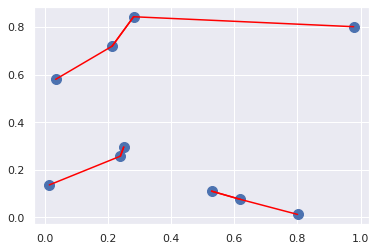

In [18]:
# Test teh function with existing data
plot_knn(X, 1)
#plot_knn(X, 2)
#plot_knn(X, 3)

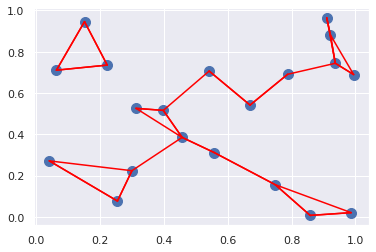

In [19]:
# Testing the function with some new data 
Y = np.random.rand(20, 2)
plot_knn(Y, 2)

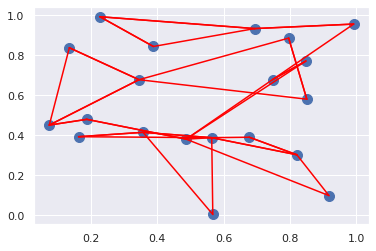

In [20]:
# What are about higher dimensional data?
Y = np.random.rand(20, 4)
# We only draw the the coordinates of the first two dimensions
plot_knn(Y, 2)